In [130]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing all necessary libraries

In [152]:
final_df

,Time,frontal axis,vertical axis,lateral axis,antenna ID,RSSI,Phase,Frequency,Label
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
...,...,...,...,...,...,...,...,...,...
173,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,2
174,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,2
175,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,4
176,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,4


In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [184]:
def variance_inflationfactor(x):
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    vif_data = []
    for i in range(scaled_x.shape[1]):
        vif = variance_inflation_factor(scaled_x, i)
        vif_data.append([x.columns[i], vif])
    return pd.DataFrame(vif_data, columns=['name', 'vif'])

In [185]:
variance_inflationfactor(final_df)
# no multicollinearity exists

,name,vif
0,Time,1.238886
1,frontal axis,4.416299
2,vertical axis,5.643431
3,lateral axis,2.201832
4,antenna ID,1.137909
5,RSSI,1.130458
6,Phase,1.008756
7,Frequency,1.047439
8,Label,2.554633


<Axes: >

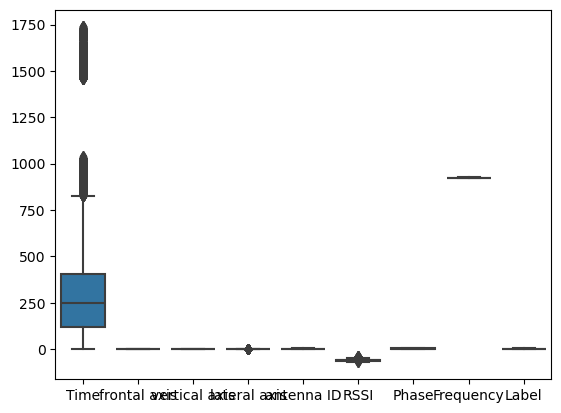

In [186]:
sns.boxplot(data=final_df)
# we ll try to remove outliers 

In [187]:
# we will try to remove these outliers by Quantile statistics method as data is skew

In [189]:
def remove_outiers(data):
    for i in data.columns:
        Q3=np.nanpercentile(data[i],75)
        Q1=np.nanpercentile(data[i],25)
        IQR=Q3-Q1
        UL=Q3+1.5*IQR
        LL=Q1-1.5*IQR
        data[i]=np.where((data[i]>UL) |  (data[i]<LL),np.nan,data[i])
    
    return data

In [190]:
remove_outiers(final_df)

,Time,frontal axis,vertical axis,lateral axis,antenna ID,RSSI,Phase,Frequency,Label
0,0.00,0.27203,1.00820,-0.082102,1.0,-63.5,2.4252,924.25,1.0
1,0.50,0.27203,1.00820,-0.082102,1.0,-63.0,4.7369,921.75,1.0
2,1.50,0.44791,0.91636,-0.013684,1.0,-63.5,3.0311,923.75,1.0
3,1.75,0.44791,0.91636,-0.013684,1.0,-63.0,2.0371,921.25,1.0
4,2.50,0.34238,0.96229,-0.059296,1.0,-63.5,5.8920,920.25,1.0
...,...,...,...,...,...,...,...,...,...
173,444.00,0.90520,0.64076,-0.082102,1.0,-59.5,1.9574,922.25,2.0
174,449.00,0.90520,0.64076,-0.082102,1.0,-59.0,6.2540,922.25,2.0
175,451.50,0.42446,0.91636,-0.161920,1.0,-53.0,5.7156,922.25,4.0
176,451.58,0.42446,0.91636,-0.161920,1.0,-52.0,5.8982,922.25,4.0


In [191]:
final_df.isnull().sum()
# removing outliers is giving us null values

Time              2640
frontal axis         0
vertical axis        0
lateral axis     18798
antenna ID           0
RSSI               502
Phase                0
Frequency            0
Label                0
dtype: int64

In [192]:
final_df.interpolate(inplace=True)
final_df.fillna(final_df.mean(),inplace=True)
# filling null values

In [200]:
final_df.isnull().sum()
# now no null values

Time             0
frontal axis     0
vertical axis    0
lateral axis     0
antenna ID       0
RSSI             0
Phase            0
Frequency        0
Label            0
dtype: int64

<Axes: >

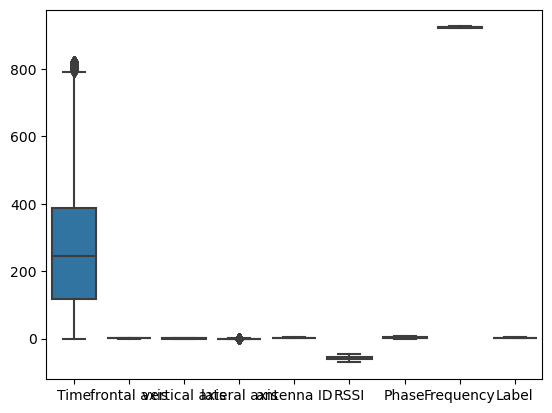

In [204]:
sns.boxplot(data=final_df)

In [207]:
from sklearn.preprocessing import StandardScaler

In [209]:
scaler=StandardScaler()

In [211]:
X_scaled=scaler.fit_transform(final_df)

In [213]:
X_scaled=pd.DataFrame(data=X_scaled)

In [215]:
X_scaled.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [217]:
X_scaled

,0,1,2,3,4,5,6,7,8
0,-1.453846,-1.092933,1.582195,-0.305771,-1.278929,-1.011541,-0.335471,0.940671,-1.768440
1,-1.451148,-1.092933,1.582195,-0.305771,-1.278929,-0.913309,0.723852,-0.548237,-1.768440
2,-1.445754,-0.658213,1.363027,0.208776,-1.278929,-1.011541,-0.057821,0.642890,-1.768440
3,-1.444405,-0.658213,1.363027,0.208776,-1.278929,-0.913309,-0.513315,-0.846019,-1.768440
4,-1.440359,-0.919050,1.472635,-0.134256,-1.278929,-1.011541,1.253170,-1.441583,-1.768440
...,...,...,...,...,...,...,...,...,...
75123,0.941390,0.472064,0.705331,-0.305771,-1.278929,-0.225685,-0.549837,-0.250456,-0.611370
75124,0.968363,0.472064,0.705331,-0.305771,-1.278929,-0.127453,1.419055,-0.250456,-0.611370
75125,0.981850,-0.716174,1.363027,-0.906054,-1.278929,1.051332,1.172336,-0.250456,1.702769
75126,0.982281,-0.716174,1.363027,-0.906054,-1.278929,1.247796,1.256011,-0.250456,1.702769


<Axes: >

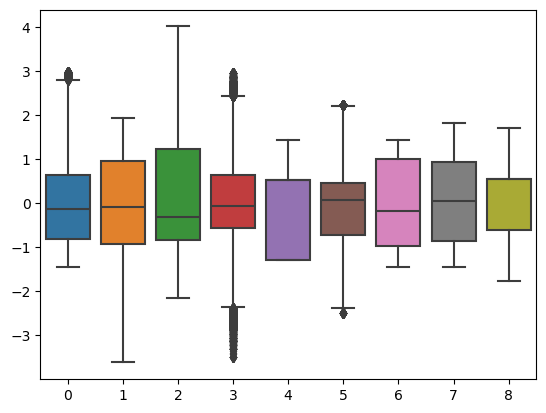

In [219]:
sns.boxplot(data=X_scaled)

In [223]:
X=X_scaled.drop(columns=8)
# removing labels from X

In [225]:
y=final_df['Label']

In [229]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    2.0
174    2.0
175    4.0
176    4.0
177    4.0
Name: Label, Length: 75128, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [21]:
# Our Train and test data for ML models is ready with testing size 30%